# Namespace Hierarchy

Let's look at the function `my_func_1` that we have used in our previous lectures again. When we print `my_text_1` inside the function, how does the code "know" that we want to print the my_text variable the we defined inside the function's local namespace and not the `my_text_` defined outside of the function in the global namespace? This may be obvious, `my_text_1` was defined inside the function, so it makes sense that any time we use `my_text_1` inside the function it would refer to the one we defined inside the function. There us a hierarchial rule that dictates the order the namespaces are searched for a name, and it is introduced below.

## The LEGB Namespace Hierarchy

There is a hierarchical rule that defines the order in which namespaces are searched for an object name when an object is called.  The local namespace is searched first, if the name is not found, then the enclosing namespace(s) are searched, then the global, and then the built-in. The order is Local -> Enclosing -> Global -> Built-In, LEGB. For now, ignore the enclosing namespace; we have not covered that yet, but we will.  If we ignore the enclosing namespace, we can think of the hierarchy as Local -> Global -> Built-In.

In the cell below, we create the variable `my_text_1` on line 1. This is added to the global namespace since it is created in the main body of our notebook and not inside of a function. Then, inside the function `my_func_1`, we also create another `my_text_1` variable, but, because it is created inside the function, it is added to the function's local namespace. So, on line 5, when we call print(`my_text_1`), the local namespace is searched first (remember the hierarchy of searching namespaces is Local - Global - Built-In), a `my_text_1` name is found in the local namespace and the value that is bound to (the value of the variable) is returned and printed)

In [1]:
my_text_1 = "I am outside the function in the notebook's GLOBAL namespace!"

def my_func_1():
    my_text_1 = "I am inside the function in the function's LOCAL namespace!"
    print(my_text_1)
    return

# Now run the function
my_func_1()
# Print my_text
print(my_text_1)

I am inside the function in the function's LOCAL namespace!
I am outside the function in the notebook's GLOBAL namespace!


#### We can visualize the above namespace in the previous example as follows. 

(Note that, as we have seen in the previous lectures, there are more objects in the global and built-in namespaces than `my_text_1` but I am only including `my_text_1` in the visual below since that is the focus on the example above.)

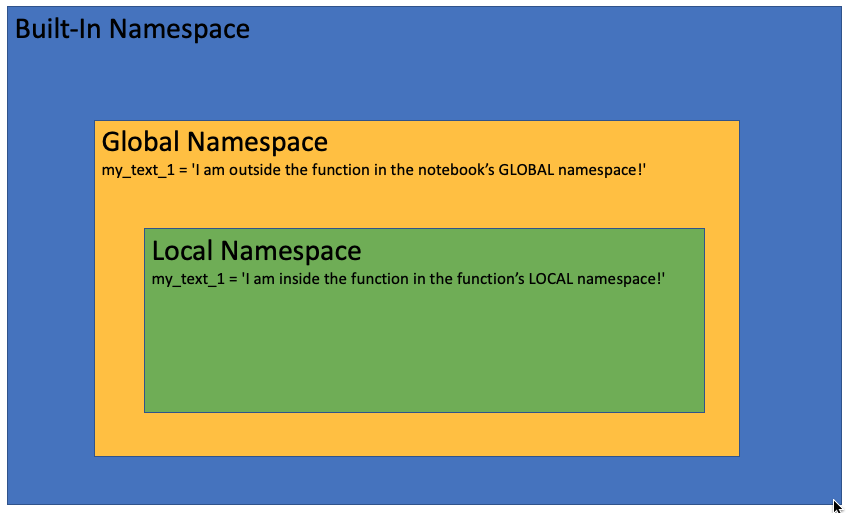


## Arguments Of Functions Also Exist In The Functions Local Namespace
Below, we have a function that takes an argument named `my_text_1b`. There also happens to be a variable defined in the global namespace called `my_text_1b`. Since the argument name exists in the function's local namespace, the argument will be found in the local namespace and the global namespace will not be searched. This is why the function prints the string that is passed to it. Argument names exist in the local namespace.

In [2]:
my_text_1 = 'I am outside the function in the notebooks GLOBAL namespace!'

def my_func_1(my_text_1):
    print(my_text_1)
    return

# Now run the function
my_func_1("This will print inside the function")
# Print my_text
print(my_text_1)

This will print inside the function
I am outside the function in the notebooks GLOBAL namespace!


## Example of variable not found in the local namespace but then found in the global namespace

In the example below, the function prints `my_text_2`, but notice that no `my_text_2` variable has been created in the function's local namespace. Therefore, when the local namespace is searched for `my_text_2`, it is not found. The global namespace is then searched and `my_text_2` is found.

#### You normally do not want to do this! You do not want your function to access variables that are not either defined in the function or passed as arguments to the function. There are exceptions and we will see some of those in this course, but as a rule do not use a function to modify variables in the global namespace.

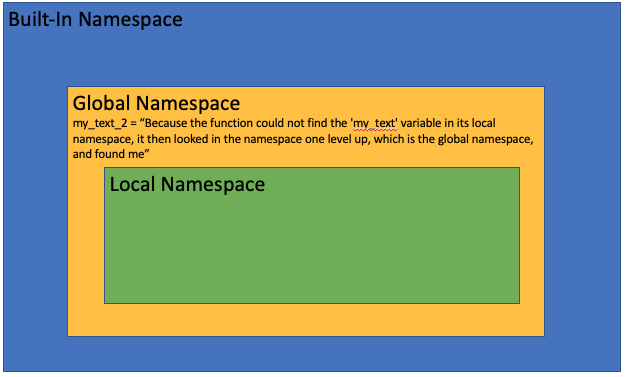

In [3]:
my_text_2 = "Because the function could not find the 'my_text_2' variable in " \
            "its local namespace, it then looked in the namespace one level " \
            "up, which is the global namespace, and found me"

def my_func_2():
    print(my_text_2)
    return

# Now run the function
my_func_2()

Because the function could not find the 'my_text_2' variable in its local namespace, it then looked in the namespace one level up, which is the global namespace, and found me


## An Example Involving The Built-In Namepsace
In the below example, we use the built-in `len()` function inside the function `my_func_3`. The name `len` only exists in the built-in namespace. First the local namespace is searched, then the global, and then the built-in.  `len` is not found in the local or global namespaces and is finally found in the built-in namespace.  The name `len` is mapped to the built-in `len()` function and this is what is used.

In [4]:
a_list = [1, 2, 3, 4, 5]

def my_func_3(list_of_numbers):
    # In the line below, when we use len, it will call the built-in len function.
    print(len(list_of_numbers))
    return

# Now run the function
my_func_3(a_list)

5


#### What if we add the len name to the global namespace? (Don't do this!)
In the code below we create a variable named `len` in the global namespace. This i a big no-no, we do not want to use the names of built-in functions for our own variables or functions.

What happens in the code below is that we create the `len` variable in the global namespace and then, when `len` is called in the `my_func_4` function, an error is returned. This is because the name `len` is found in the global namespace before the built-in namespace is searched. `len` is defined as a string in the global namespace, so our code is treating a string as a function and trying to call it (i.e. we are following a string variable by parenthesis as if it is a function). This returns an errors since strings are not callable.

We can visualize where the name `len` is in the namespaces in the below graphic:


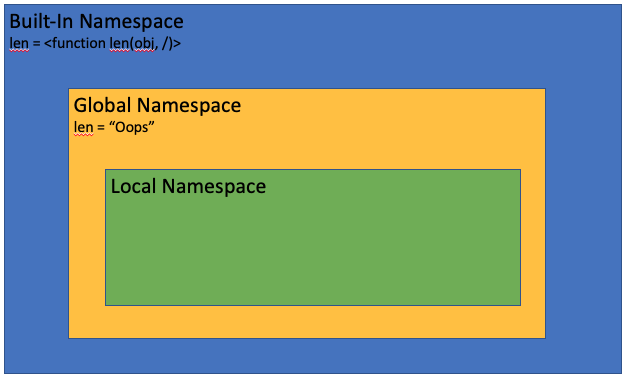


### NOTE: Aftern you run the cell below you will have added the `len` variable to the global namespace. The global namespace is shared by all the cells in this notebook. So if you try to run the above cell again, you will receive the same error as the below cell.
You will need to restart the kernal (Kernal menu -> restart & clear output (or just restart)) to clear the namespace and run through the notebook again without that error.


In [5]:
len = "Oops"

def my_func_4(list_of_numbers):
    print(len(list_of_numbers))
    return

a_list = [1, 2, 3, 4, 5]
# Now run the function
my_func_4(a_list)

TypeError: 'str' object is not callable

#### We should never do the above, but if you are wondering is there anyone we could still access the built-in len() functin, the answer is yes:

You can still access built-in functions via the `__builtin__` module, which is always available. You should never need to actually do this!

In [ ]:
def my_func_5(list_of_numbers):
    print(__builtins__.len(list_of_numbers))
    return

a_list = [1, 2, 3, 4, 5]
# Now run the function
my_func_5(a_list)

## The Enclosing Namespace

So far, we have discussed the local, global, and built-in scopes and the hierarchy that they are searched in.  We now need to discuss what an enclosing scope is.

In the cell below, we define the function `inner_func` *inside* the function `outer_func`. The function `outer_func` then returns `inner_func` so that it can be used outside of `outer_func`.

This may seems strange or unnecessary but it is not, and you will see this when we introduce decorator functions in the upcoming lectures. Let's first consider the local namespaces of these two functions. The local namespace of `outer_func` contains the names `my_text` and `inner_func`.  The local namespace of `inner_func` does not contain anything (no variables or other objects are created in this function).

What happens when we print `my_text` inside `inner_func`? Well, first the local namespace of `inner_func` is searched and `my_text` is not found. Then, the **local namespace of `outer_func` is searched**. This namespace is the **enclosing namespace** of `inner_func` since `inner_func` is defined inside this namespace. The `my_text` name is found in this enclosing namespace and the is used in the print statement.

The hierarchical order of the the namespace search is Local -> Enclosing -> Global -> Built-In (LEGB).


In [ ]:
# Firt, we define my_outer_func
def outer_func():
    # We define a variable, my_text, in the local namespace of my_outer_func
    my_text = 'I am in the enclosing namespace (which is also the local namespace of outer_func)'
    # We now define a function, my_inner_func, in the local namespace of
    # my_outer_func
    def inner_func():
        # We now print my_text inside my_inner_func.  Note that my_text does
        # not exist inside the local namespace for my_inner_func, but it does
        # exist inside the 
        print(my_text)
    return inner_func

# we call outer_func which 
returned_function = outer_func()

# We call returned_function
print('We call returned_function')
returned_function()

### We visualize the relationship between the namespaces, and the location of the my_text variable, in the graphic below:

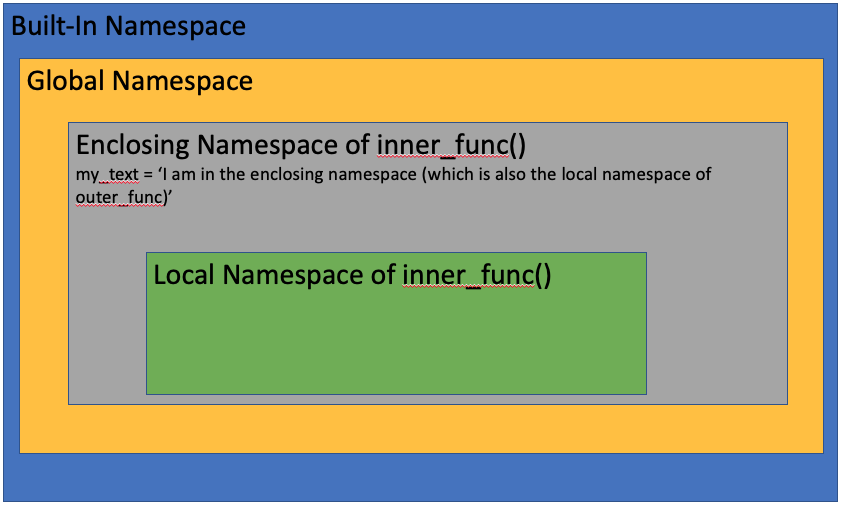

# Introducing Scope:

We have not formally defined scope yet!

> "In computer programming, the scope of a name binding – an association of a name to an entity, such as a variable – is the region of a computer program where the binding is valid: where the name can be used to refer to the entity." 
https://en.wikipedia.org/wiki/Scope_(computer_science)

In python, the scope of an object is the portion of the program that can access that object. As you may already be thinking - this is another way of describing namespace hierarchy.

For example, an object that is defined within a local namespace can only be accessed from within that namespace and any namespaces it encloses.

Let's see an example below. In this example, we define the `my_text_6` variable in the local namespace of `my_func_6`. We then try to access that variable from the global namespace. What happens we we try to access `my_text_6` from the global namespace?  First the global namespace is searched for the name `my_text_6` and is not found, then the built-in namespace is searched for `my_text_6` and it is not found. An error message is returned because `my_text_6` can not be found in the namespace hierarchy. Remember, the hierarchy is Local -> Enclosing -> Global -> Built-In. If the search for a name begins in the global namespace, then the only namespaces that can be searched are the global and the built-in namespace. The hierarchy moves from left to right.

The scope of the `my_text_6` variable only includes the local namespace of the `my_func_6` function. It is only a valid name-to-object-mapping in the function's local namespace.

In [9]:
def my_func_6():
    my_text_6 = "I am inside the function in the function's LOCAL namespace!"
    return

print(my_text_6)

NameError: name 'my_text_6' is not defined

In [10]:
my_text_7 = "I am created in the global namespace. So I can potentiall be " \
    "accessed anywhere in this notebook since all encolsing and local namespaces" \
    "are below me in the hierarchy. My scope includes the global namespace and " \
    "all enclosing and local namespaces."
    
def my_func_7():
    # We are able to print my_text_7 from within this function.
    print(my_text_7)
    return

my_func_7()
# We also can print it from outside of the function
print(my_text_7)

I am created in the global namespace. So I can potentiall be accessed anywhere in this notebook since all encolsing and local namespacesare below me in the hierarchy. My scope includes the global namespace and all enclosing and local namespaces.
I am created in the global namespace. So I can potentiall be accessed anywhere in this notebook since all encolsing and local namespacesare below me in the hierarchy. My scope includes the global namespace and all enclosing and local namespaces.


## Avoiding A Common Problem That Can Lead To Errors!

We have seen how you can access variables in the global namespace from within a function. You do not normally want to do this.  Sometimes, you will accidentally do this when you have a long script that you are converting into functions. It is very easy to accidentally leave some variables in the global namespace and not pass them as arguments to the function.


Below is an example that I sometimes see inn the homework for the Intro To Python For Beginners Course. The problem on the homework ask to create a function that will take a filepath to a file as an argument and return the number of lines in the file.

Let's say you started to work on this problem, and started with just a small script before wrapping the code in a function.  You write the code below to count the lines in a file.

In [11]:
filepath = 'test_file.txt'

with open(filepath, 'r') as f:
    counter = 0
    for line in f:
        counter += 1

print(counter)

4


You test the code above and see that it works. Now you decide to wrap it in a function to complete the homework, so you adjust the code as shown in the cell below.

In [12]:
filepath = 'test_file.txt'

def count_lines(filepath):
    with open(filepath, 'r') as f:
        counter = 0
        for line in f:
            counter += 1
    return counter


Now, you test your function and see that it works!

In [14]:
num_lines = count_lines()
print(num_lines)

4


But, there is of course a big problem. The filepath variable is never passed to the function. So, the function is using the filepath variable from the global namespace, but this not what you intended. If you took this same code and used in other code (let's say you added this function to a module of functions you wanted to use throughout your code) it would not work.

This is a pretty simple example of this potential mistake, but it can be even more confusing when you have a function with multiple arguments.  You first write the function as a script and then when you wrap it in a function definition, you forget to add some of the arguments to the function that you should. It's just something to watch out for.